In [1]:
# Generate GMET grid (mask) based on nldas_topo and nldas_forcing files.

import os
import numpy as np
import xarray as xr
import netCDF4 as nc

# root_dir = '/glade/u/home/hongli/scratch/2020_04_21nldas_gmet/data/nldas_topo'
root_dir = '/glade/u/home/hongli/work/2020_04_21nldas_gmet/data/nldas_topo'
nldas_topo_file = 'NLDAS_topo.nc' # generated from step01_calculate_gradient_ns_we
gridinfo_tpl = 'conus_ens_grid_eighth_deg_v1p1.nc' 
# AndyN's latest CONUS topography grid file @hydro-c1 /d2/anewman/prob_qpe/version_1p1/grid/conus_ens_grid_eighth_deg_v1p1.nc

ofile = 'conus_ens_grid_eighth.nc'
if os.path.exists(os.path.join(root_dir,ofile)):
    os.remove(os.path.join(root_dir,ofile))

# read NLDAS topography
f = xr.open_dataset(os.path.join(root_dir,nldas_topo_file))
lat = f['lat'].values[:] #(224)
lon = f['lon'].values[:] #(464)
NLDAS_elev = f['NLDAS_elev'].values[0,:,:] #(time,ny,nx)->(ny,nx)
gradient_n_s = f['gradient_n_s'].values[0,:,:] 
gradient_w_e = f['gradient_w_e'].values[0,:,:] 

mask_topo = (~np.isnan(NLDAS_elev))
(ny,nx) = np.shape(mask_topo)

# process latitude and longitude
lat_2d = lat.reshape(ny,1).repeat(nx,axis=1)
lon_2d = lon.reshape(1,nx).repeat(ny,axis=0)
dx = 1/8.0
dy = 1/8.0
startx = lat[0]
starty = lon[0]

# save
with nc.Dataset(os.path.join(root_dir,gridinfo_tpl)) as src:
    with nc.Dataset(os.path.join(root_dir,ofile), "w") as dst:
        
        # create dimensions
        dst.createDimension('param', 1)
        dst.createDimension('y', ny)
        dst.createDimension('x', nx)

        # copy variable attributes all at once via dictionary (for the included variables)
        for name, variable in src.variables.items():
            x = dst.createVariable(name, variable.datatype, variable.dimensions)               
            dst[name].setncatts(src[name].__dict__)

        # assign values for variables ([:] is necessary)
        dst.variables['latitude'][:] = lat_2d
        dst.variables['longitude'][:] = lon_2d
        dst.variables['elev'][:] = NLDAS_elev
        dst.variables['gradient_n_s'][:] = gradient_n_s 
        dst.variables['gradient_w_e'][:] = gradient_w_e 
        dst.variables['mask'][:] = mask_topo
        dst.variables['data_mask'][:] = mask_topo
        dst.variables['land_mask'][:] = mask_topo
        dst.variables['dx'][:] = dx
        dst.variables['dy'][:] = dy
        dst.variables['startx'][:] = startx
        dst.variables['starty'][:] = starty     
        
print('Done')

Done


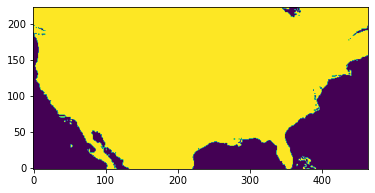

In [2]:
import matplotlib.pyplot as plt
plt.imshow(mask_topo, origin='lower')
plt.show()

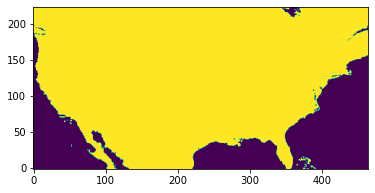

In [2]:
import matplotlib.pyplot as plt
plt.imshow(mask_topo, origin='lower')
plt.show()